<a href="https://colab.research.google.com/github/Praveen5612/ML_Algorithams/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/diabetes.csv')

In [ ]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

In [ ]:
y = data['Outcome']
x = data.drop(['Outcome'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [ ]:
print(x_train.head)
print(x_test.head)
print(y_train.head)
print(y_test.head)

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7      150             78             29      126  35.2   
118            4       97             60             23        0  28.2   
247            0      165             90             33      680  52.3   
157            1      109             56             21      135  25.2   
468            8      120              0              0        0  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
603                     0.692   54  
118    

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

<Axes: >

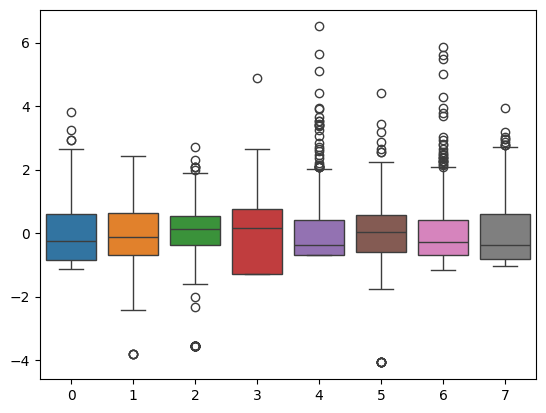

In [ ]:
sns.boxplot(data = x_train)

In [ ]:
from scipy.stats import zscore
z_score = np.abs(zscore(x_train))
x_train = x_train[(z_score < 3).all(axis = 1)]
y_train = y_train[(z_score < 3).all(axis = 1)]
print(z_score)

[[0.90832902 0.91569367 0.44912368 ... 0.37852648 0.67740401 1.69955804]
 [0.03644676 0.75182191 0.47230103 ... 0.50667229 0.07049698 0.96569189]
 [1.12606292 1.38763205 1.06340683 ... 2.54094063 0.11855487 0.88240283]
 ...
 [0.03644676 0.84620959 0.21634972 ... 0.94927168 0.95656442 1.04898095]
 [2.0708387  1.12937261 0.24436264 ... 0.26640405 0.50001442 0.11706589]
 [0.32707418 0.47521786 0.65388473 ... 4.07275877 0.52121586 2.94889395]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(y_pred[:10])
print(y_test[:10])

[1 0 0 1 0 0 1 1 0 0]
[1 0 0 1 0 0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.7922077922077922
[[98  9]
 [23 24]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
x_train.shape

(550, 8)

In [ ]:
k_range = range(1, 500)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_k = knn.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))
    print(f"Accuracy for k={k}: {accuracy_scores[-1]}")

Accuracy for k=1: 0.7467532467532467
Accuracy for k=2: 0.7597402597402597
Accuracy for k=3: 0.7922077922077922
Accuracy for k=4: 0.7857142857142857
Accuracy for k=5: 0.8051948051948052
Accuracy for k=6: 0.7922077922077922
Accuracy for k=7: 0.7857142857142857
Accuracy for k=8: 0.7857142857142857
Accuracy for k=9: 0.7922077922077922
Accuracy for k=10: 0.7922077922077922
Accuracy for k=11: 0.7922077922077922
Accuracy for k=12: 0.7922077922077922
Accuracy for k=13: 0.7922077922077922
Accuracy for k=14: 0.7987012987012987
Accuracy for k=15: 0.7922077922077922
Accuracy for k=16: 0.7792207792207793
Accuracy for k=17: 0.7922077922077922
Accuracy for k=18: 0.7857142857142857
Accuracy for k=19: 0.7922077922077922
Accuracy for k=20: 0.7922077922077922
Accuracy for k=21: 0.7987012987012987
Accuracy for k=22: 0.7987012987012987
Accuracy for k=23: 0.8051948051948052
Accuracy for k=24: 0.8116883116883117
Accuracy for k=25: 0.8116883116883117
Accuracy for k=26: 0.7922077922077922
Accuracy for k=27: 0.

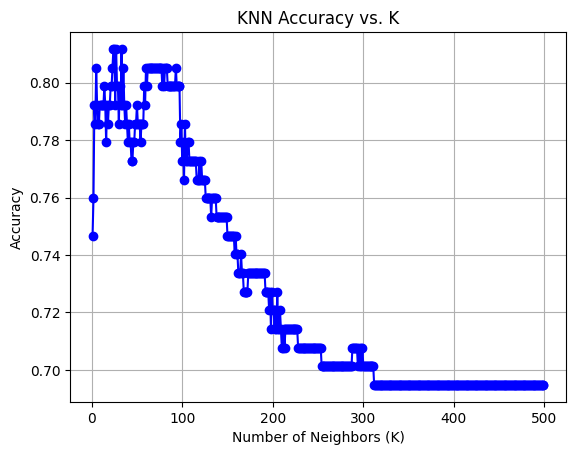

In [ ]:
plt.plot(k_range, accuracy_scores, marker='o', color='blue')
plt.title("KNN Accuracy vs. K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()